In [127]:
import pandas as pd

df= pd.read_csv(r"preprocessed.csv")


In [128]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [129]:
# Define the start and end time
start_time1 = '2022-02-20 00:00:00'
end_time1 = '2022-02-28 21:53:00'

start_time2 = '2022-03-01 03:00:00'
end_time2 = '2022-03-23 14:54:00'

start_time3 = '2022-05-01 03:00:00'
end_time3 = '2022-05-30 12:00:00'


# Convert start and end time to datetime
start_time1 = pd.to_datetime(start_time1)
end_time1 = pd.to_datetime(end_time1)

start_time2 = pd.to_datetime(start_time2)
end_time2 = pd.to_datetime(end_time2)

start_time3 = pd.to_datetime(start_time3)
end_time3 = pd.to_datetime(end_time3)

# Filter the DataFrame
filtered_df1 = df[(df['timestamp'] >= start_time1) & (df['timestamp'] <= end_time1)]
filtered_df2 = df[(df['timestamp'] >= start_time2) & (df['timestamp'] <= end_time2)]
filtered_df3 = df[(df['timestamp'] >= start_time3) & (df['timestamp'] <= end_time3)]


In [130]:
merged_chunks = [filtered_df1, filtered_df2, filtered_df3]  # List of DataFrames
merged_chunks = [filtered_df1]  # List of DataFrames

import numpy as np
import pandas as pd

RUL_CAP = 10  # RUL cap in days

# Iterate through each DataFrame in chunks
for i, df in enumerate(merged_chunks):
    print(f"Processing chunk {i+1} with {len(df)} rows.")
    
    # Ensure 'timestamp' is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Calculate the maximum time for the current chunk
    max_time = df['timestamp'].max()

    # Compute RUL in days
    df['rul'] = (max_time - df['timestamp']).dt.total_seconds() / (24 * 3600)  # Convert to days

    # Cap the RUL at RUL_CAP days
    df['rul'] = df['rul'].clip(upper=RUL_CAP)  # Cap at RUL_CAP days

    # Convert 'rul' in days to Timedelta for consistency
    # df['rul'] = pd.to_timedelta(df['rul'], unit='D')  

    # Compute reversed time for plotting
    df['reversed_time'] = max_time - df['timestamp']  # This is already a Timedelta

    # Optional: Preview the processed DataFrame
    # print(df[['timestamp', 'rul', 'reversed_time']].head())


Processing chunk 1 with 640390 rows.


In [131]:
# Merge all DataFrames in merged_chunks into a single DataFrame
final_df = pd.concat(merged_chunks, ignore_index=True)

# Check the result
print(f"Final DataFrame has {len(final_df)} rows.")


Final DataFrame has 640390 rows.


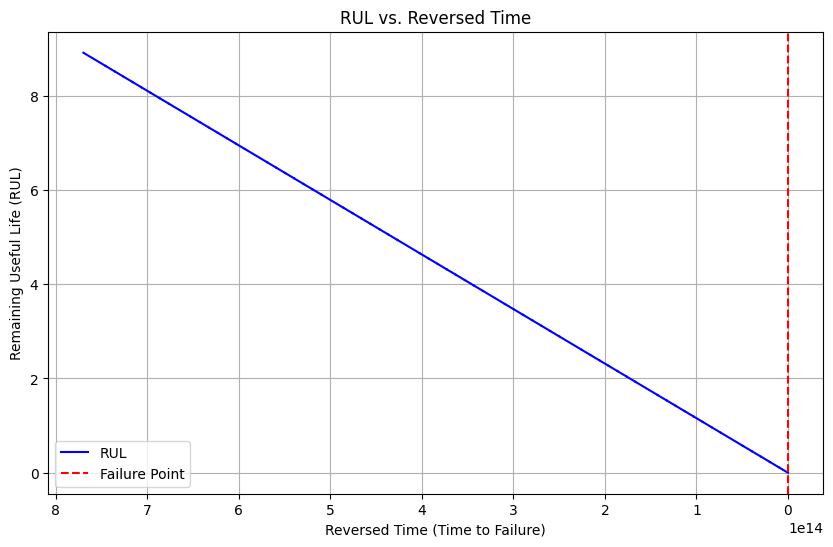

In [132]:
import matplotlib.pyplot as plt

df = final_df

# Plot RUL vs. reversed time
plt.figure(figsize=(10, 6))
plt.plot(df['reversed_time'], df['rul'], label='RUL', color='blue')

# Invert the X-axis to represent time to failure
plt.gca().invert_xaxis()
plt.axvline(x=0, color='red', linestyle='--', label='Failure Point')

# Add labels, legend, and grid
plt.xlabel('Reversed Time (Time to Failure)')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL vs. Reversed Time')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
# merged_chunks[2]

In [134]:
final_df

,Unnamed: 0,index,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,...,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,cluster,timestamp,cluster_changed,rul,reversed_time
0,3591795,3591795,-0.008,8.228,8.232,-0.030,1.630,70.800,18.844062,3.7500,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:00,0,8.911806,8 days 21:53:00
1,3591796,3591796,-0.008,8.226,8.228,-0.028,1.630,70.775,18.853406,3.7900,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:01,0,8.911794,8 days 21:52:59
2,3591797,3591797,-0.006,8.228,8.230,-0.030,1.630,70.775,18.853406,3.8750,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:02,0,8.911782,8 days 21:52:58
3,3591798,3591798,-0.006,8.226,8.228,-0.028,1.630,70.775,18.853406,3.8150,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:03,0,8.911771,8 days 21:52:57
4,3591799,3591799,-0.006,8.224,8.226,-0.028,1.630,70.800,18.862750,3.7650,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:04,0,8.911759,8 days 21:52:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640385,4232180,4232180,9.224,8.754,-0.006,-0.020,1.728,66.400,31.093719,5.6800,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:56,0,0.000046,0 days 00:00:04
640386,4232181,4232181,9.250,8.778,-0.008,-0.022,1.728,66.425,31.196500,5.8075,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:57,0,0.000035,0 days 00:00:03
640387,4232182,4232182,9.274,8.798,-0.008,-0.020,1.726,66.600,31.131094,5.8075,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:58,0,0.000023,0 days 00:00:02
640388,4232183,4232183,9.290,8.824,-0.006,-0.022,1.728,66.725,31.177813,5.6900,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:59,0,0.000012,0 days 00:00:01


In [135]:
df.drop(["Unnamed: 0","index","timestamp","cluster_changed","reversed_time"], axis=1, inplace=True)


In [136]:
df.columns


Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'gpsLong',
       'gpsLat', 'gpsSpeed', 'gpsQuality', 'cluster', 'rul'],
      dtype='object')

# Train Test Split

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Flatten
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.layers import TimeDistributed, MaxPooling1D, Dropout

In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['rul'])
y = df['rul']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features with the scaler
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensions
# pca = PCA(n_components=2)  # Adjust n_components as needed
# X_pca = pca.fit_transform(X_scaled)

# Now split the reduced data sequentially
train_size = int(len(df) * 0.8)

# Sequential split: first 80% for training, remaining 20% for testing
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]



In [157]:
import pandas as pd

# Convert X_train back to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])

# Optionally, reset index if needed
X_train_df.reset_index(drop=True, inplace=True)
X_test_df = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])
X_test_df.reset_index(drop=True, inplace=True)


In [162]:
X_train_df

,PC1,PC2
0,0.178227,-5.489089
1,0.172116,-5.489730
2,0.162869,-5.494559
3,0.169062,-5.491057
4,0.173231,-5.488986
...,...,...
512307,0.983504,1.171878
512308,0.983012,1.170698
512309,0.984220,1.184928
512310,0.984021,1.194735


In [166]:
X_train_df['rul']= y

In [168]:
X_train_df

,PC1,PC2,rul
0,0.178227,-5.489089,8.911806
1,0.172116,-5.489730,8.911794
2,0.162869,-5.494559,8.911782
3,0.169062,-5.491057,8.911771
4,0.173231,-5.488986,8.911759
...,...,...,...
512307,0.983504,1.171878,1.649086
512308,0.983012,1.170698,1.649074
512309,0.984220,1.184928,1.649063
512310,0.984021,1.194735,1.649051


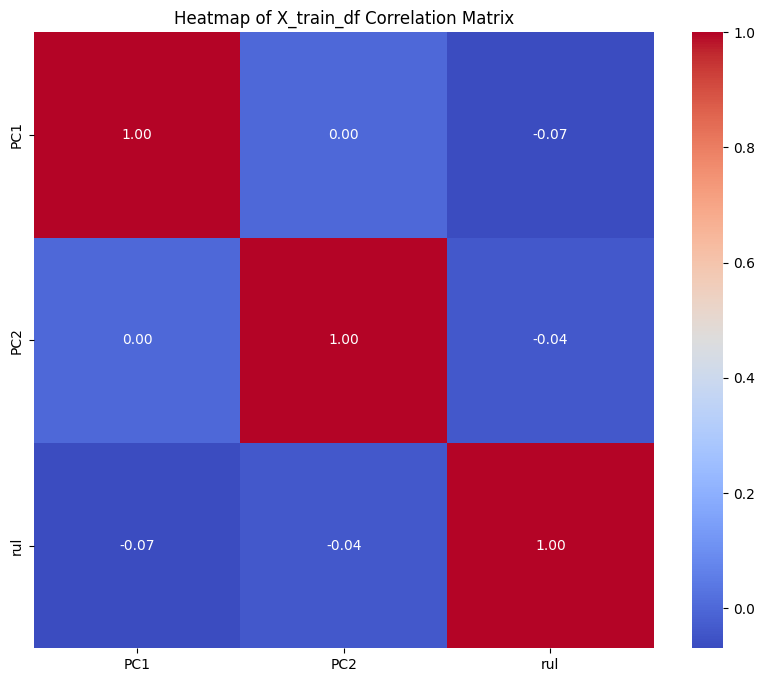

In [169]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of X_train_df Correlation Matrix')
plt.show()

In [160]:
import dask.array as da

# Identify constant columns in X_train
constant_columns = [col for col in X_train_df.columns if X_train_df[col].nunique() == 1]

# Drop constant columns from both train and test
X_train_cleaned = X_train_df.drop(columns=constant_columns)
X_test_cleaned = X_test_df.drop(columns=constant_columns)

# Convert to NumPy and continue with Dask
X_train_np = X_train_cleaned.values
y_train_np = y_train.values

X_test_np = X_test_cleaned.values  # Convert cleaned DataFrame to NumPy

# Create Dask arrays with chunks
X_train_dask = da.from_array(X_train_np, chunks=(100, X_train_np.shape[1]))
y_train_dask = da.from_array(y_train_np, chunks=(100,))
X_test_dask = da.from_array(X_test_np, chunks=(100, X_test_np.shape[1]))

# Logistic Regression with Dask
from dask_ml.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1)

# Fit the model
lr_model.fit(X_train_dask, y_train_dask)

# Make predictions
lr_preds = lr_model.predict(X_test_dask)


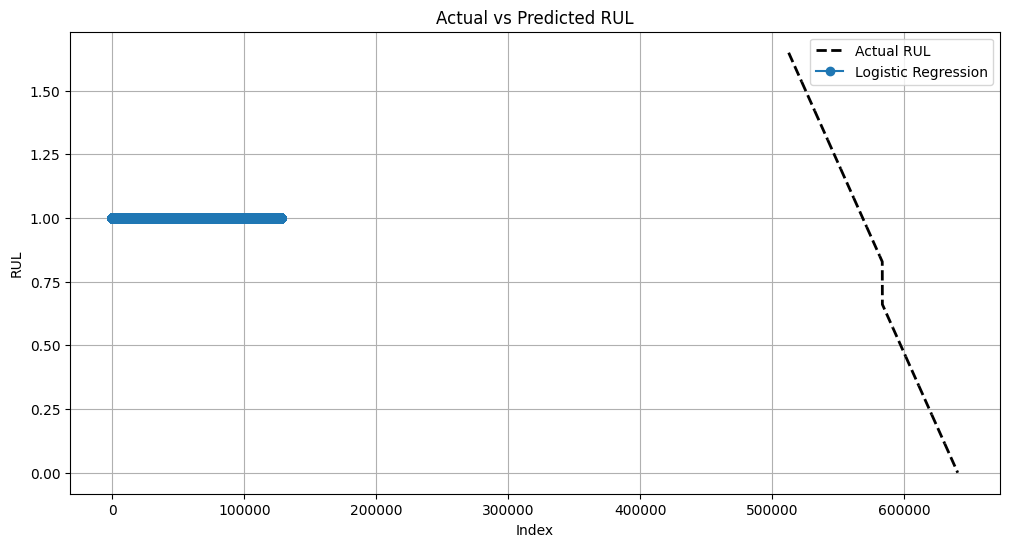

In [161]:
import matplotlib as mpl

# Set a larger chunk size
mpl.rcParams['agg.path.chunksize'] = 10000

# Now run the plotting code again
plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Actual RUL', color='black', linestyle='--', linewidth=2)
plt.plot(lr_preds, label='Logistic Regression', linestyle='-', marker='o')
# plt.plot(perceptron_preds, label='Perceptron', linestyle='-', marker='s')
# plt.plot(lstm_preds, label='LSTM', linestyle='-', marker='^')
# plt.plot(cnn_lstm_preds, label='CNN-LSTM', linestyle='-', marker='d')

plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.grid()

plt.show()


In [141]:
perceptron_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1, random_state=42)
perceptron_model.fit(X_train, y_train)
perceptron_preds = perceptron_model.predict(X_test)

c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [143]:
# LSTM Model
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# X_train = X_train.astype('timedelta64[s]').astype('float64')  # Convert to seconds
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics=['mae'])


In [ ]:
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

12008/12008 [==============================] - 46s 4ms/step - loss: 5.5122 - mae: 1.9107


In [145]:
lstm_preds = lstm_model.predict(X_test_lstm).flatten()

8005/8005 [==============================] - 9s 1ms/step


In [ ]:
# Convert DataFrame to NumPy array
X_train_np = X_train

# Reshape to add a time step dimension (samples, time_steps, features)
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)

# Build CNN-LSTM Model for Regression
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_np.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(50, activation='relu'))
cnn_lstm_model.add(Dense(1, activation='linear'))  # Linear activation for regression

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_lstm_model.fit(X_train_reshaped, y_train, epochs=1, batch_size=32)

# Convert X_test to NumPy array and reshape to match the input shape



12008/12008 [==============================] - 334s 28ms/step - loss: 5.4131 - mae: 1.8888


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [148]:
X_test_np = X_test
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# Make predictions with the trained model
cnn_lstm_preds = cnn_lstm_model.predict(X_test_reshaped)

8005/8005 [==============================] - 29s 4ms/step


In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [150]:
import pandas as pd

# Assuming y_test and model predictions (lr_preds, perceptron_preds, lstm_preds, cnn_lstm_preds) are defined

results = {
    'Model': ['Logistic Regression', 'Perceptron', 'LSTM', 'CNN-LSTM'],
    'MSE': [
        calculate_metrics(y_test, lr_preds)[0],
        calculate_metrics(y_test, perceptron_preds)[0],
        calculate_metrics(y_test, lstm_preds)[0],
        calculate_metrics(y_test, cnn_lstm_preds)[0]
    ],
    'MAE': [
        calculate_metrics(y_test, lr_preds)[1],
        calculate_metrics(y_test, perceptron_preds)[1],
        calculate_metrics(y_test, lstm_preds)[1],
        calculate_metrics(y_test, cnn_lstm_preds)[1]
    ],
    'RMSE': [
        calculate_metrics(y_test, lr_preds)[2],
        calculate_metrics(y_test, perceptron_preds)[2],
        calculate_metrics(y_test, lstm_preds)[2],
        calculate_metrics(y_test, cnn_lstm_preds)[2]
    ],
    'R²': [
        calculate_metrics(y_test, lr_preds)[3],
        calculate_metrics(y_test, perceptron_preds)[3],
        calculate_metrics(y_test, lstm_preds)[3],
        calculate_metrics(y_test, cnn_lstm_preds)[3]
    ]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [151]:
results_df

,Model,MSE,MAE,RMSE,R²
0,Logistic Regression,18.091341,3.516219,4.253392,-1.745959
1,Perceptron,5.456079,1.945790,2.335825,0.171860
2,LSTM,5.014834,1.790878,2.239383,0.238833
3,CNN-LSTM,4.841310,1.737107,2.200298,0.265171


In [152]:
X_test

array([[-0.33100928, -0.13598262,  0.29400062, ...,  1.30265463,
         0.29744818,  1.77770254],
       [-0.33172774,  1.16571043,  0.6141197 , ...,  0.3099111 ,
         0.29744818,  1.77770254],
       [ 3.19086416,  0.49452495, -2.8914701 , ..., -0.61192218,
         0.29744818, -0.7207201 ],
       ...,
       [-0.33029082,  0.29113541,  0.39832514, ..., -0.61192218,
         0.29744818, -0.7207201 ],
       [-0.33172774,  0.94198193,  0.55624103, ..., -0.61192218,
         0.29744818, -0.7207201 ],
       [-0.33029082,  0.94779306,  0.56124289, ...,  2.08266741,
         0.29744818,  0.944895  ]])

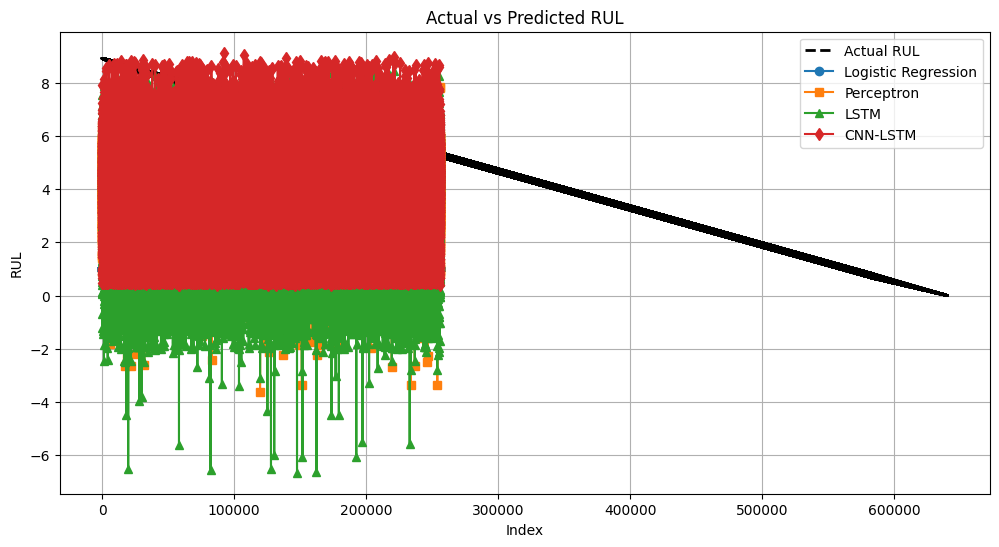

In [153]:
import matplotlib as mpl

# Set a larger chunk size
mpl.rcParams['agg.path.chunksize'] = 10000

# Now run the plotting code again
plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Actual RUL', color='black', linestyle='--', linewidth=2)
plt.plot(lr_preds, label='Logistic Regression', linestyle='-', marker='o')
plt.plot(perceptron_preds, label='Perceptron', linestyle='-', marker='s')
plt.plot(lstm_preds, label='LSTM', linestyle='-', marker='^')
plt.plot(cnn_lstm_preds, label='CNN-LSTM', linestyle='-', marker='d')

plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.grid()

plt.show()


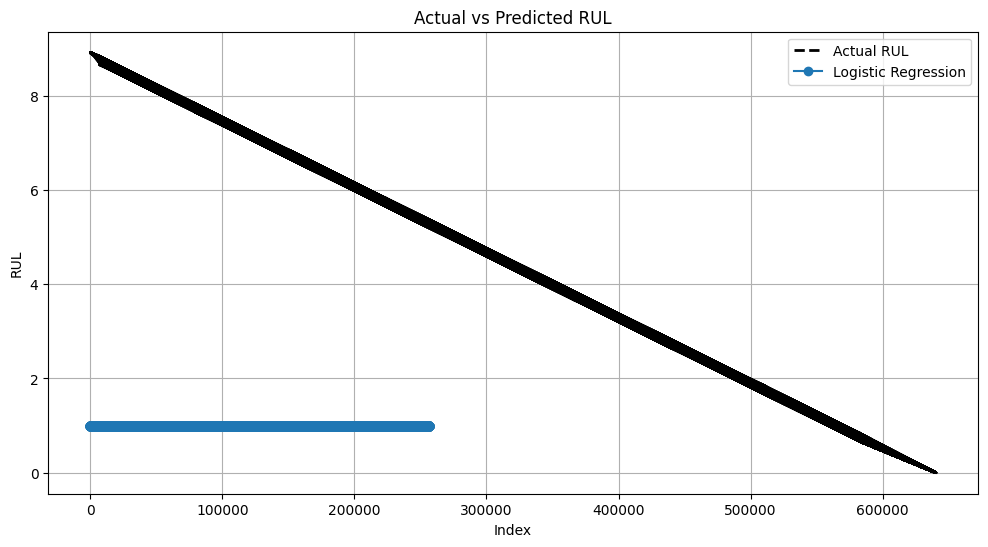

In [154]:
import matplotlib as mpl

# Set a larger chunk size
mpl.rcParams['agg.path.chunksize'] = 10000

# Now run the plotting code again
plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Actual RUL', color='black', linestyle='--', linewidth=2)
plt.plot(lr_preds, label='Logistic Regression', linestyle='-', marker='o')
# plt.plot(perceptron_preds, label='Perceptron', linestyle='-', marker='s')
# plt.plot(lstm_preds, label='LSTM', linestyle='-', marker='^')
# plt.plot(cnn_lstm_preds, label='CNN-LSTM', linestyle='-', marker='d')

plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.grid()

plt.show()
